In [1]:
%matplotlib inline
from skimage import data, io, morphology
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from pylab import *
from skimage.morphology import square
import skimage as si
import numpy as np
from numpy import array
import matplotlib.pyplot as pl

def show(*args):
    "Show multiple images in a row"
    pl.figure(figsize=(20,12))
    for i,img in enumerate(args):
        pl.subplot(1, len(args), i+1)
        imshow(img, cmap='gray')

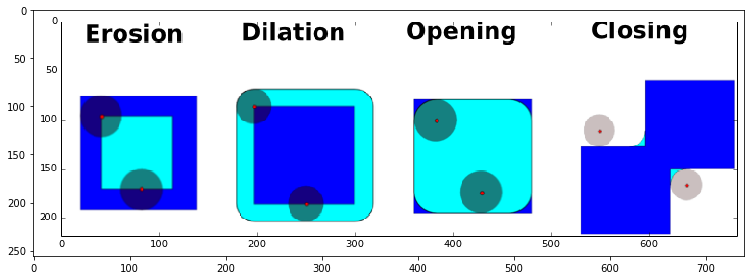

In [2]:
figure(figsize=(15,4))
io.imshow(io.imread('img/morphology.png'))

In [3]:
arr = zeros([7,7],dtype='uint8')
arr[1:6,1:6]=255
arr

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [4]:
eroded = morphology.erosion(arr, square(3))
eroded

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255,   0,   0],
       [  0,   0, 255, 255, 255,   0,   0],
       [  0,   0, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [5]:
morphology.dilation(eroded, square(3))

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

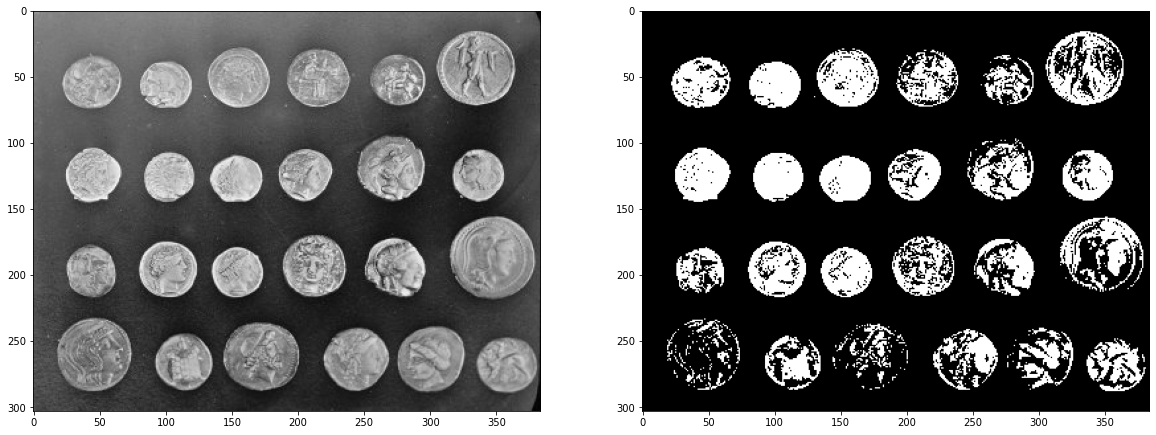

In [6]:
# Threshold
coins = data.coins()
binary = coins > 150
show(coins, binary)

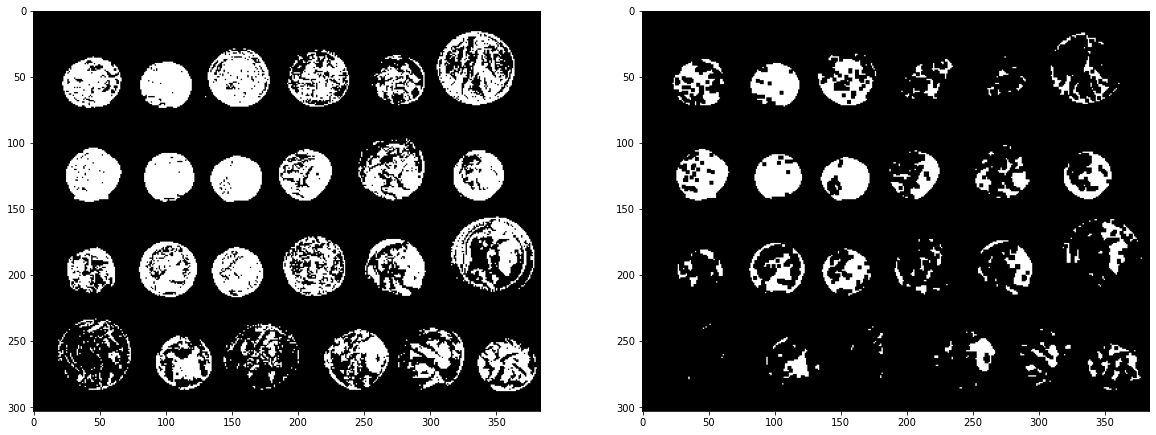

In [15]:
# Erosion
eroded = morphology.erosion(binary, square(3))
show(binary, eroded)

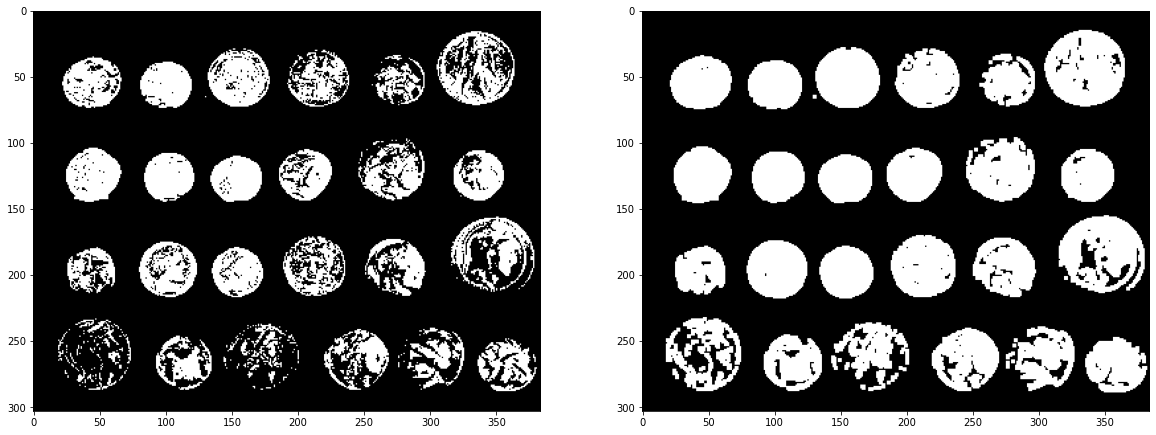

In [8]:
# Dilatation
dilated = morphology.dilation(binary, square(3))
show(binary, dilated)

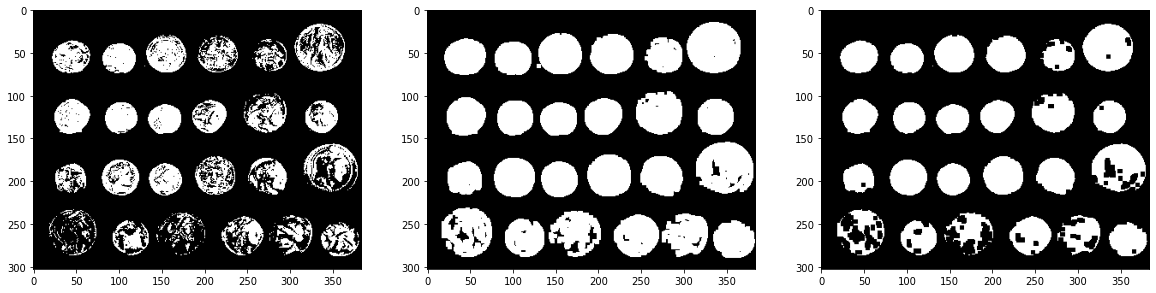

In [9]:
# Closing (small dark spots were removed)
dilated = morphology.dilation(binary, square(5))
eroded = morphology.erosion(dilated, square(5))
show(binary, dilated, eroded)
result = eroded

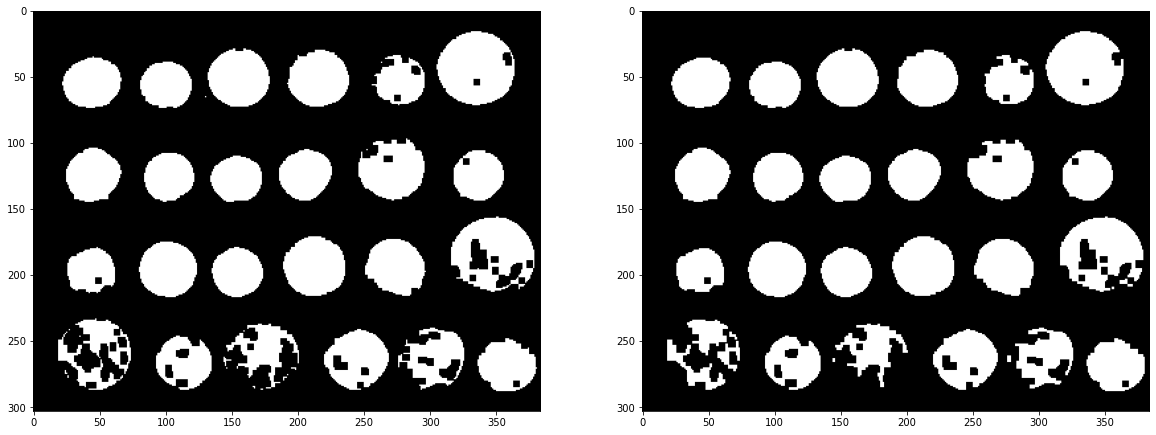

In [10]:
opened = morphology.opening(result, square(2))
show(result, opened)

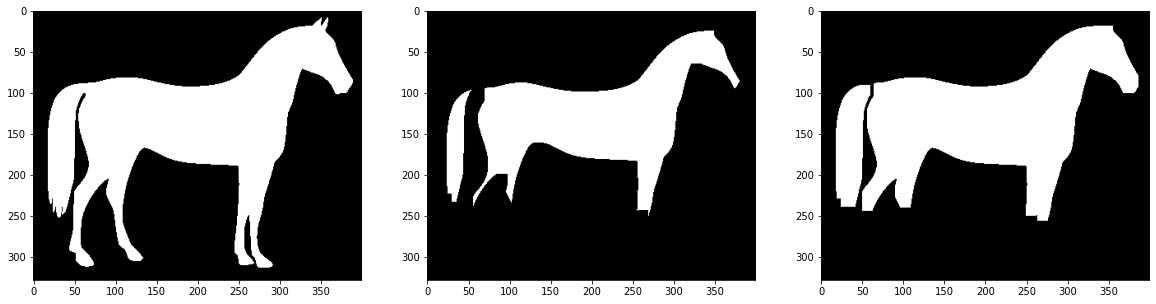

In [11]:
horse = (255 - data.horse())

count = 3
eroded = horse
for i in range(count):
    eroded = morphology.erosion(eroded, square(5))

dilated = eroded
for i in range(count):
    dilated = morphology.dilation(dilated, square(5))

show(horse, eroded, dilated)

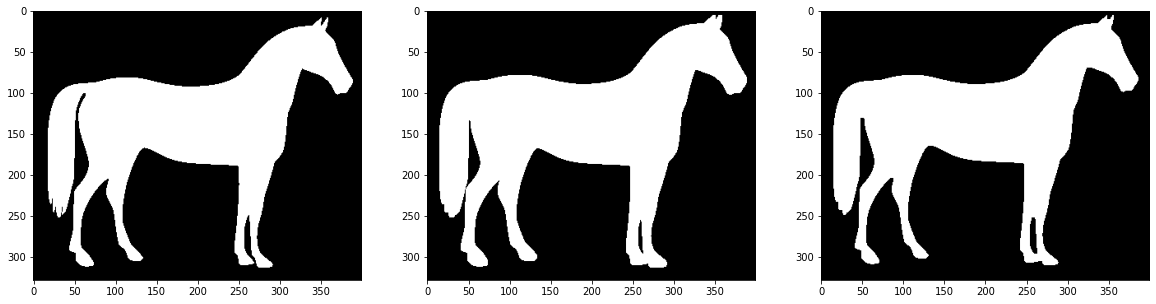

In [19]:
horse = 255 - data.horse()

count = 3
dilated = horse
for i in range(count):
    dilated = morphology.dilation(dilated, square(2))

eroded = dilated
for i in range(count):
    eroded = morphology.erosion(eroded, square(2))

show(horse, dilated, eroded)